In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
data=pd.read_csv('intern_attrition_dataset.csv')
data.head()

,Intern Name,Age,Department,Duration of Internship (months),Performance Score,Attendance Rate,Socioeconomic Status,Participation in Projects,Hours Worked per Week,Mentorship Level,Distance from Work (miles),Job Satisfaction,Attrition,Work-Life Balance Index,Performance Adjusted Score,Engagement Level,Socioeconomic-Performance Interaction
0,Intern_1,28,Human Resources,3,3.71,97.50,High,No,55,Low,0.18,Low,1,55.000000,3.704318,1.0750,11.13
1,Intern_2,21,Finance,6,3.64,88.46,Low,No,41,High,46.47,High,0,13.666667,3.587969,1.1846,3.64
2,Intern_3,29,Finance,8,2.28,80.29,Medium,No,41,Low,29.91,Low,0,41.000000,2.272913,0.9029,4.56
3,Intern_4,29,Finance,2,3.00,65.97,Low,No,25,Low,9.86,Low,0,25.000000,3.123134,0.7597,3.00
4,Intern_5,29,Human Resources,8,3.82,90.45,High,No,34,Low,47.73,Medium,0,34.000000,3.893377,1.1045,11.46


In [71]:
data.isna().sum()

Intern Name                              0
Age                                      0
Department                               0
Duration of Internship (months)          0
Performance Score                        0
Attendance Rate                          0
Socioeconomic Status                     0
Participation in Projects                0
Hours Worked per Week                    0
Mentorship Level                         0
Distance from Work (miles)               0
Job Satisfaction                         0
Attrition                                0
Work-Life Balance Index                  0
Performance Adjusted Score               0
Engagement Level                         0
Socioeconomic-Performance Interaction    0
dtype: int64

In [73]:
data.duplicated().sum()

0

In [75]:
data.dtypes

Intern Name                               object
Age                                        int64
Department                                object
Duration of Internship (months)            int64
Performance Score                        float64
Attendance Rate                          float64
Socioeconomic Status                      object
Participation in Projects                 object
Hours Worked per Week                      int64
Mentorship Level                          object
Distance from Work (miles)               float64
Job Satisfaction                          object
Attrition                                  int64
Work-Life Balance Index                  float64
Performance Adjusted Score               float64
Engagement Level                         float64
Socioeconomic-Performance Interaction    float64
dtype: object

In [77]:
numcol = data.select_dtypes(include=['float64', 'int64']).columns
catcol = data.select_dtypes(include=['object']).columns

In [79]:
data[numcol]

,Age,Duration of Internship (months),Performance Score,Attendance Rate,Hours Worked per Week,Distance from Work (miles),Attrition,Work-Life Balance Index,Performance Adjusted Score,Engagement Level,Socioeconomic-Performance Interaction
0,28,3,3.71,97.50,55,0.18,1,55.000000,3.704318,1.0750,11.13
1,21,6,3.64,88.46,41,46.47,0,13.666667,3.587969,1.1846,3.64
2,29,8,2.28,80.29,41,29.91,0,41.000000,2.272913,0.9029,4.56
3,29,2,3.00,65.97,25,9.86,0,25.000000,3.123134,0.7597,3.00
4,29,8,3.82,90.45,34,47.73,0,34.000000,3.893377,1.1045,11.46
...,...,...,...,...,...,...,...,...,...,...,...
49995,27,7,1.32,67.55,58,18.19,1,19.333333,1.414161,0.9755,1.32
49996,27,11,3.17,88.19,30,48.77,1,30.000000,3.215033,1.6819,9.51
49997,26,7,4.88,79.12,40,46.28,0,40.000000,5.114914,1.3912,9.76
49998,23,3,1.54,89.68,58,27.90,1,19.333333,1.544125,1.5968,1.54


In [81]:
data[catcol]

,Intern Name,Department,Socioeconomic Status,Participation in Projects,Mentorship Level,Job Satisfaction
0,Intern_1,Human Resources,High,No,Low,Low
1,Intern_2,Finance,Low,No,High,High
2,Intern_3,Finance,Medium,No,Low,Low
3,Intern_4,Finance,Low,No,Low,Low
4,Intern_5,Human Resources,High,No,Low,Medium
...,...,...,...,...,...,...
49995,Intern_49996,Finance,Low,No,High,High
49996,Intern_49997,Human Resources,High,Yes,Low,High
49997,Intern_49998,Data Science,Medium,Yes,Low,Low
49998,Intern_49999,Finance,Low,Yes,High,Medium


In [83]:
data.drop(['Intern Name'],axis=1,inplace=True)

In [85]:
dept=LabelEncoder()
soc=LabelEncoder()
ment=LabelEncoder()
pat=LabelEncoder()
jobs=LabelEncoder()
data['Department']=dept.fit_transform(data['Department'])
data['Socioeconomic Status']=soc.fit_transform(data['Socioeconomic Status'])+1
data['Mentorship Level']=ment.fit_transform(data['Mentorship Level'])
data['Participation in Projects']=pat.fit_transform(data['Participation in Projects'])
data['Job Satisfaction']=jobs.fit_transform(data['Job Satisfaction'])

In [87]:
encoders = {
    'Department':dept,
    'Socioeconomic Status':soc,
    'Mentorship Level':ment,
    'Participation in Projects':pat,
    'Job Satisfaction':jobs
}

In [89]:
pickle.dump(encoders, open('encoderatt.pkl','wb'))

In [91]:
data

,Age,Department,Duration of Internship (months),Performance Score,Attendance Rate,Socioeconomic Status,Participation in Projects,Hours Worked per Week,Mentorship Level,Distance from Work (miles),Job Satisfaction,Attrition,Work-Life Balance Index,Performance Adjusted Score,Engagement Level,Socioeconomic-Performance Interaction
0,28,2,3,3.71,97.50,1,0,55,1,0.18,1,1,55.000000,3.704318,1.0750,11.13
1,21,1,6,3.64,88.46,2,0,41,0,46.47,0,0,13.666667,3.587969,1.1846,3.64
2,29,1,8,2.28,80.29,3,0,41,1,29.91,1,0,41.000000,2.272913,0.9029,4.56
3,29,1,2,3.00,65.97,2,0,25,1,9.86,1,0,25.000000,3.123134,0.7597,3.00
4,29,2,8,3.82,90.45,1,0,34,1,47.73,2,0,34.000000,3.893377,1.1045,11.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27,1,7,1.32,67.55,2,0,58,0,18.19,0,1,19.333333,1.414161,0.9755,1.32
49996,27,2,11,3.17,88.19,1,1,30,1,48.77,0,1,30.000000,3.215033,1.6819,9.51
49997,26,0,7,4.88,79.12,3,1,40,1,46.28,1,0,40.000000,5.114914,1.3912,9.76
49998,23,1,3,1.54,89.68,2,1,58,0,27.90,2,1,19.333333,1.544125,1.5968,1.54


In [93]:
col1=[ 'Duration of Internship (months)', 'Performance Score',
       'Attendance Rate', 'Hours Worked per Week',
       'Distance from Work (miles)', 'Attrition', 'Work-Life Balance Index',
       'Performance Adjusted Score', 'Engagement Level',
       'Socioeconomic-Performance Interaction']

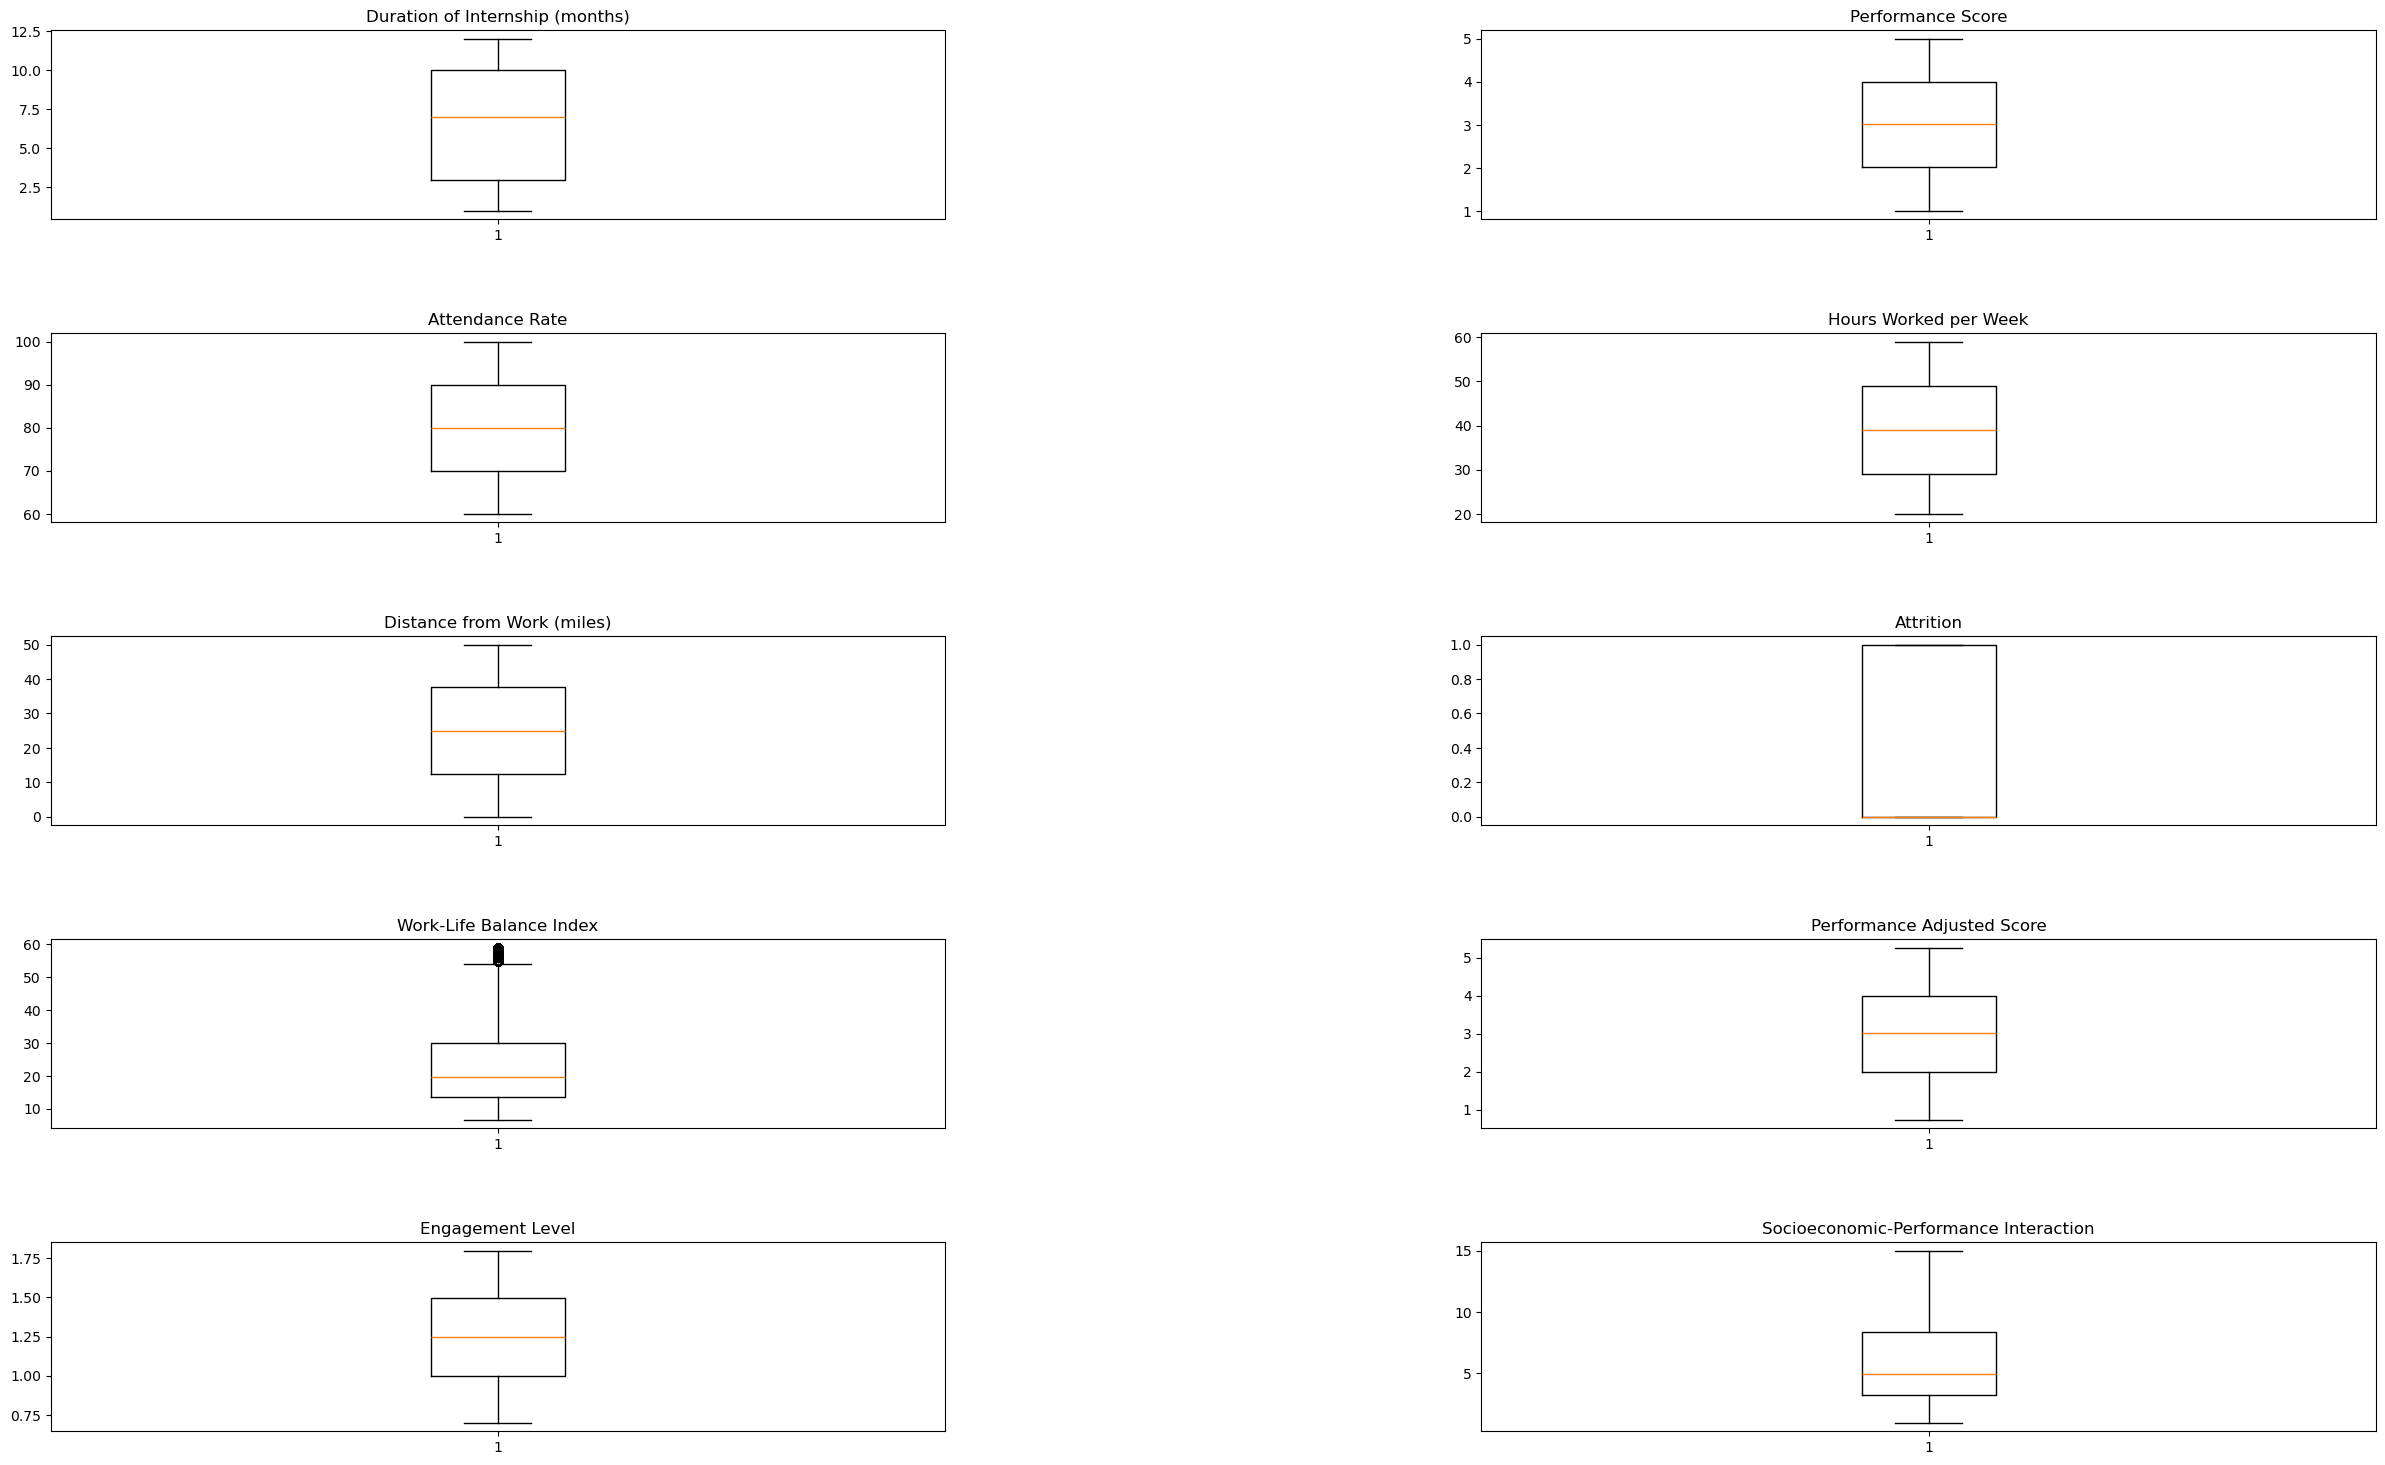

In [95]:
a=1
plt.figure(figsize=(30, 30))
for i in col1:
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(8,2,a)
    a=a+1
    plt.boxplot(data[i])
    plt.title(i)  
plt.show()

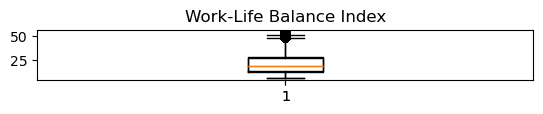

In [96]:
y=['Work-Life Balance Index']

a=1
for i in y:
    Q1=data[i].quantile(.25)
    Q3=data[i].quantile(.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    higher=Q3+1.5*IQR
    ui=np.where(data[i] >= higher)[0]
    li=np.where(data[i] <= lower)[0]

    data.drop(index=ui,inplace=True)
    data.drop(index=li,inplace=True)

    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(5,1,a)
    a=a+1
    plt.boxplot(data[i])
    plt.title(i)

    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)

a=1
for i in y:
    Q1=data[i].quantile(.25)
    Q3=data[i].quantile(.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    higher=Q3+1.5*IQR
    ui=np.where(data[i] >= higher)[0]
    li=np.where(data[i] <= lower)[0]

    data.drop(index=ui,inplace=True)
    data.drop(index=li,inplace=True)

    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(5,1,a)
    a=a+1
    plt.boxplot(data[i])
    plt.title(i)

    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)

In [97]:
data.shape

(46295, 16)

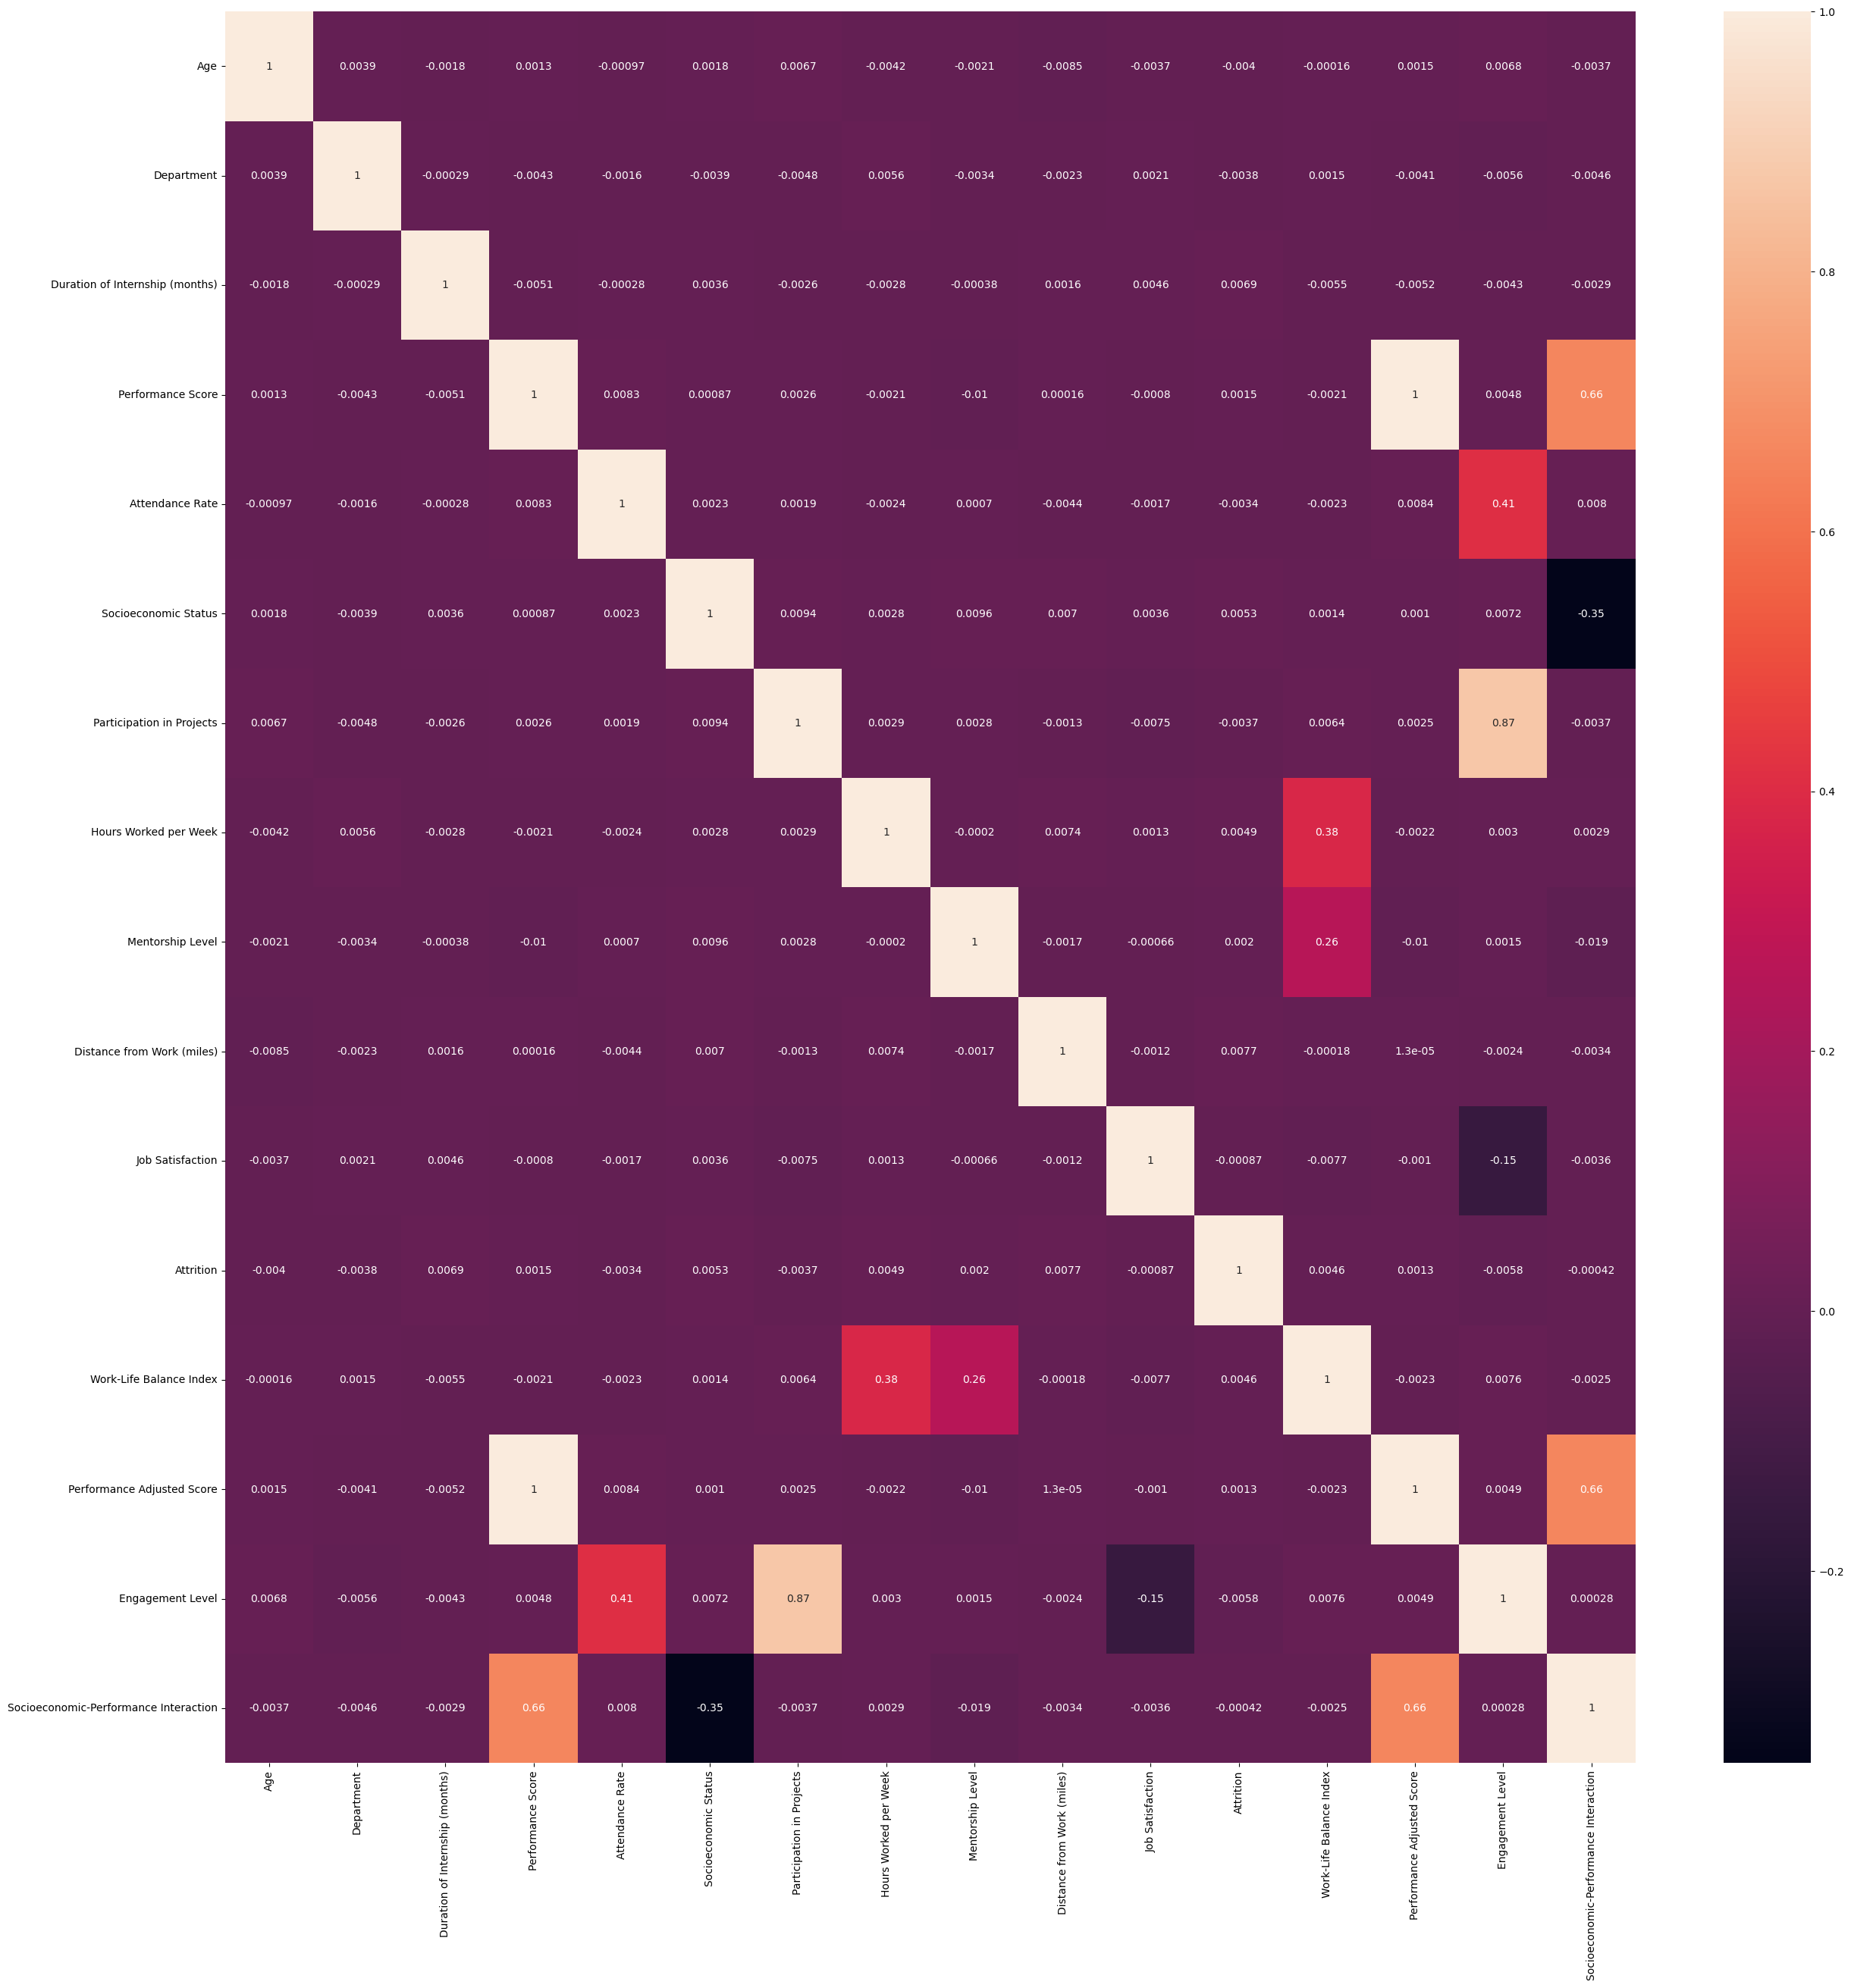

In [98]:
import  seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [99]:
def correlation(data,threshold):
    col_corr=set()
    cor_matrix=data.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]>=threshold):
                colname=cor_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(data,.9) 
len(set(corr_features))

1

In [100]:
corr_features

{'Performance Adjusted Score'}

In [102]:
data.drop(['Performance Adjusted Score'],axis=1,inplace=True)

In [105]:
data.drop('Socioeconomic-Performance Interaction',axis=1,inplace=True)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
y=data['Attrition']
x=data.drop('Attrition',axis=1)

In [108]:
x.columns

Index(['Age', 'Department', 'Duration of Internship (months)',
       'Performance Score', 'Attendance Rate', 'Socioeconomic Status',
       'Participation in Projects', 'Hours Worked per Week',
       'Mentorship Level', 'Distance from Work (miles)', 'Job Satisfaction',
       'Work-Life Balance Index', 'Engagement Level'],
      dtype='object')

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [119]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
pickle.dump(model, open('attrition.pkl','wb'))

In [123]:
model.score(x_train,y_train)

0.5086132411707528

In [125]:
model.score(x_test,y_test)

0.49486985635597797

In [131]:
model5 = AdaBoostClassifier(random_state=42,learning_rate=0.1)
model5.fit(x_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, random_state=42)

In [132]:
print(model5.score(x_train,y_train))
print(model5.score(x_test,y_test))

0.516335457392807
0.49443784425963927


In [135]:
model6 = GradientBoostingClassifier(random_state=42,learning_rate=0.1,n_estimators=201)
model6.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=201, random_state=42)

In [137]:
y_pred=model6.predict(x_test)
accuracy_score(y_test,y_pred)

0.4877416567663895

In [139]:
model7 = xgb.XGBClassifier(random_state=42,learning_rate=0.001,n_estimators=200,n_jobs=100)        
model7.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=100,
              num_parallel_tree=None, random_state=42, ...)

In [141]:
y_pred=model7.predict(x_test)
accuracy_score(y_test,y_pred)

0.4990819742952803

In [145]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [161]:
xgb.XGBClassifier(random_state=42,learning_rate=0.001,n_estimators=200,n_jobs=100)        
model7.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=100,
              num_parallel_tree=None, random_state=42, ...)

In [165]:
y_pred=model7.predict(x_test)
accuracy_score(y_test,y_pred)

0.5002700075602117

In [167]:
import pickle
pickle.dump(model7, open('attrition.pkl','wb'))